In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

usm_data_dir = os.path.pardir
machine = r"tencent_machine"

   identical page   75   50  anonymous pages  file-backed pages
0            9164  332  616              316               8848

110.dynamic-html:0.012914 , 0.023961

   identical page   75   50  anonymous pages  file-backed pages
0           10616  404  768              268              10348

210.thumbnailer:0.015179 , 0.028855

   identical page    75    50  anonymous pages  file-backed pages
0          132620  1068  2388            83960              48660

411.image-recognition:0.003475 , 0.007770

   identical page   75   50  anonymous pages  file-backed pages
0           15756  560  976              244              15512

504.dna-visualisation:0.010403 , 0.018130

              benchmarks         rss  shared-clean  shareable anon  \
0       110.dynamic-html   25.105469      8.648438        0.308594   
1        210.thumbnailer   25.992188      8.949219        0.261719   
2  411.image-recognition  300.128906     10.078125       81.992188   
3  504.dna-visualisation   52.570312   

/tmp/ipykernel_295683/214256264.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))
/tmp/ipykernel_295683/214256264.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))
/tmp/ipykernel_295683/214256264.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))
/tmp/ipykernel_295683/214256264.py:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))


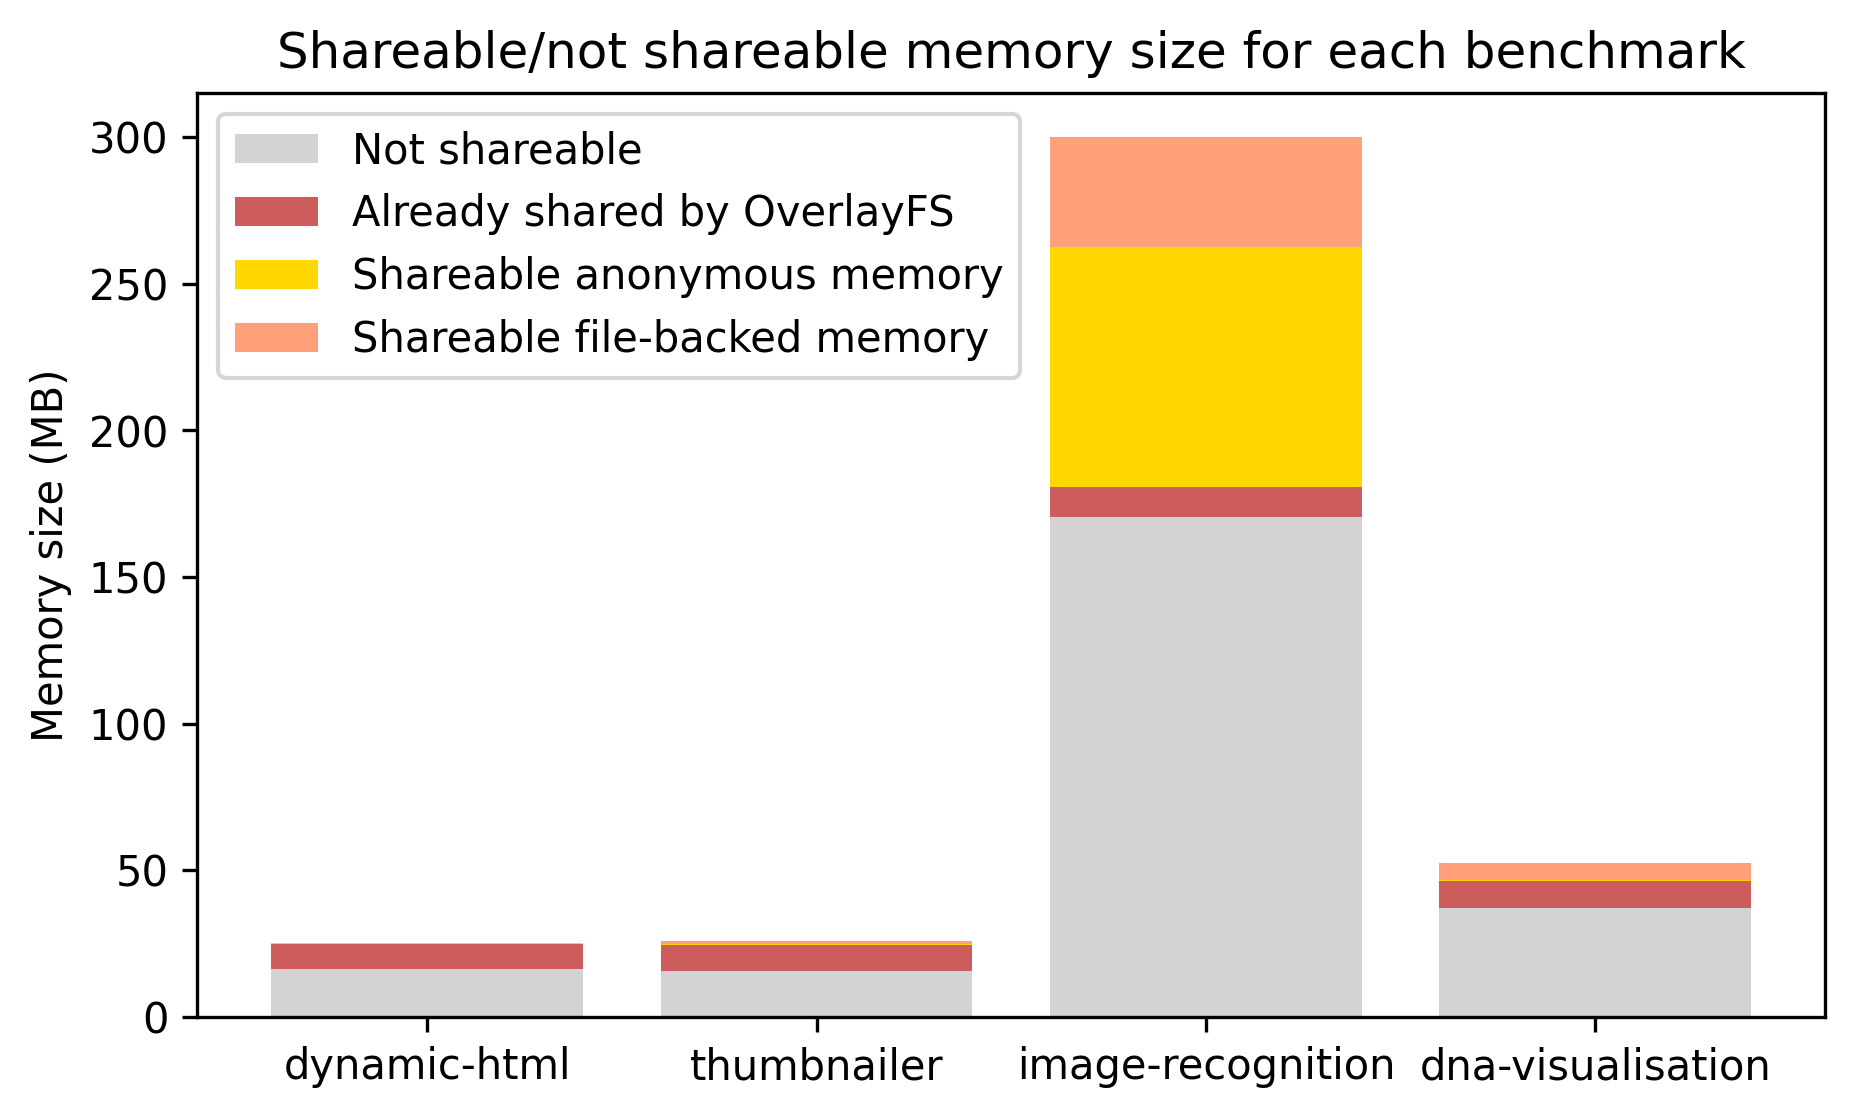

In [3]:
benchmarks = ["110.dynamic-html", "210.thumbnailer", "411.image-recognition", "504.dna-visualisation"]
x = pd.Series(benchmarks)
x = x.str.slice(start=4)
aslr = "aslr1/"
# aslr = "aslr0/"
df_dict = {
    "benchmarks": benchmarks,
    "rss": [],
    "shared-clean": [],
    "shareable anon": [],
    "shareable file-backed": [],
    "not shareable": []
}
for benchmark in benchmarks:
    data_pmap = pd.read_csv(os.path.join(usm_data_dir, machine, benchmark, "pmap_result.csv"))
    data_checkpoint = pd.read_csv(os.path.join(usm_data_dir, machine, benchmark, "checkpoint_result.csv"))
    data_checkpoint.iloc[0] = data_checkpoint.iloc[0].values * 4
    print (data_checkpoint)
#     print (data_pmap)
#     if data_pmap.iloc[0]["rss"] > data_pmap.iloc[1]["rss"]:
#         larger_pmapfile_index = 0
#     else :
#         larger_pmapfile_index = 1
    larger_pmapfile_index = 1
    identical75 = data_checkpoint["75"] / data_pmap.iloc[larger_pmapfile_index]["rss"]
    identical50 = data_checkpoint["50"] / data_pmap.iloc[larger_pmapfile_index]["rss"]

    print ("\n%s:%f , %f\n" % (benchmark, identical75, identical50))
    df_dict["rss"].append(data_pmap.iloc[larger_pmapfile_index]["rss"] / 1024)
    df_dict["shared-clean"].append(data_pmap.iloc[larger_pmapfile_index]["shared_clean"] / 1024)
    df_dict["shareable anon"].append(data_checkpoint.iloc[0]["anonymous pages"] / 1024)
    df_dict["shareable file-backed"].append(data_checkpoint.iloc[0]["file-backed pages"] /1024 - data_pmap.iloc[larger_pmapfile_index]["shared_clean"] /1024)
    df_dict["not shareable"].append(data_pmap.iloc[larger_pmapfile_index]["rss"] / 1024 - data_checkpoint.iloc[0]["identical page"] / 1024)
df = pd.DataFrame(df_dict)
print (df)
# df.to_csv("/data/aslr1_share.csv", sep=',',index=False)
# df.to_csv("/data/aslr0_share.csv", sep=',',index=False)

plt.figure(figsize=(7,4))
plt.bar(x, df["not shareable"], color = "lightgrey", label="Not shareable")
plt.bar(x, df["shared-clean"], color = "indianred", bottom = df["not shareable"], label="Already shared by OverlayFS")
plt.bar(x, df["shareable anon"], color = "gold", bottom = df["shared-clean"] + df["not shareable"], label="Shareable anonymous memory")
bar = plt.bar(x, df["shareable file-backed"], color = "lightsalmon", bottom = df["shared-clean"] + df["not shareable"] + df["shareable anon"], label = "Shareable file-backed memory")
# plt.text(benchmark, df["rss"] + 8000, str(df["rss"].values))
# plt.text(benchmarks, df["shareable file-backed"], str(df["shareable file-backed"]))

plt.rcParams['figure.dpi'] = 300
plt.legend(loc="upper left")
plt.title("Shareable/not shareable memory size for each benchmark")
plt.ylabel("Memory size (MB)")

plt.savefig(os.path.join(os.path.pardir, 'tencent_machine', 'plots', 'shareable_absolute.png'))
plt.savefig(os.path.join(os.path.pardir, 'tencent_machine', 'plots', 'shareable_absolute.pdf'))
# plt.xticks(rotation=30)
# plt.show()
# plt.savefig('/data/share.jpg')


              benchmarks  perc_not_shareable  perc_shared_clean  \
0       110.dynamic-html           64.353509          34.448421   
1        210.thumbnailer           60.114217          34.430418   
2  411.image-recognition           56.847969           3.357932   
3  504.dna-visualisation           70.731164          17.550899   

   perc_shareable_anon  perc_shareable_file_backed  
0             1.229189                   -0.031119  
1             1.006913                    4.448452  
2            27.318991                   12.475108  
3             0.453262                   11.264675  


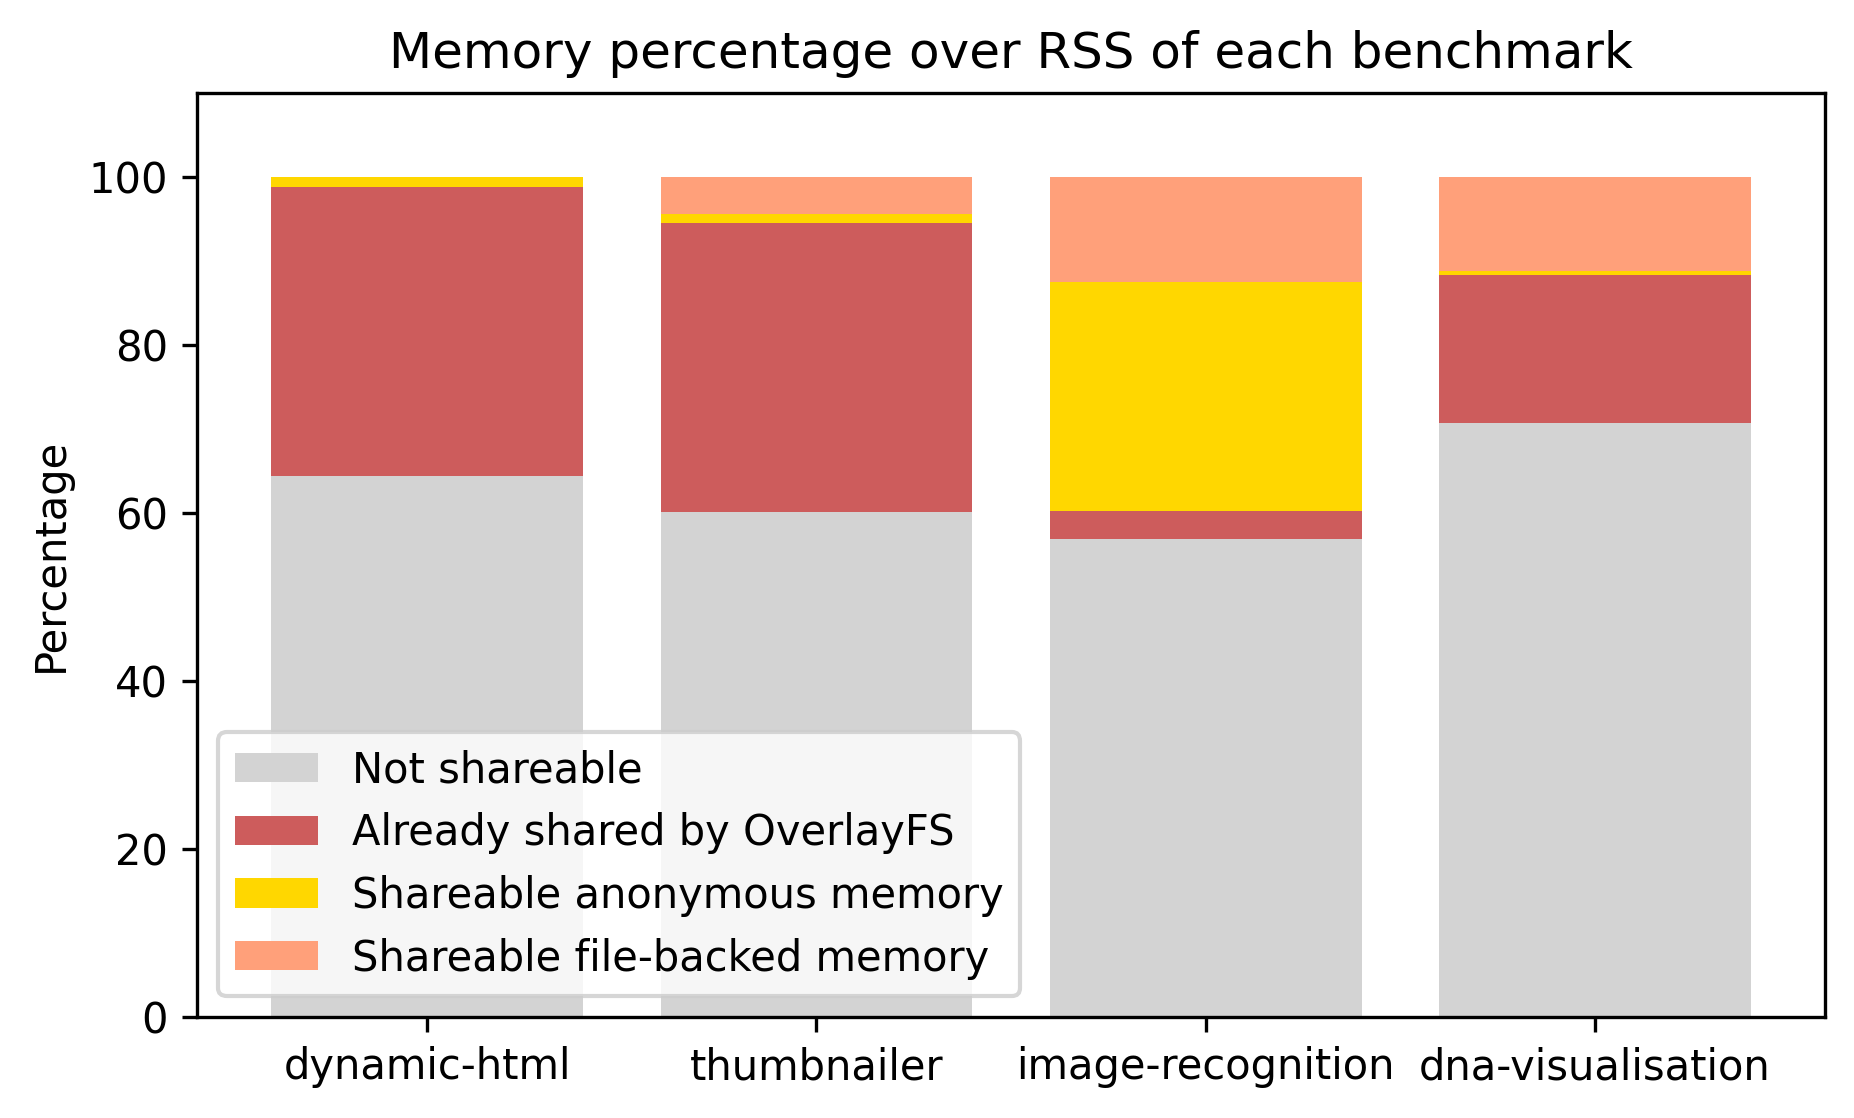

In [4]:
perc_not_shareable = df["not shareable"] / df["rss"] * 100
perc_shared_clean = df["shared-clean"] / df["rss"] * 100
perc_shareable_anon = df["shareable anon"] / df["rss"] * 100
perc_shareable_file_backed = df["shareable file-backed"] / df["rss"] * 100
# print (perc_not_shareable)
# print (perc_shared_clean)
# print (perc_shareable_anon)
# print (perc_shareable_file_backed)

perc_dict = {
    "benchmarks": benchmarks,
    "perc_not_shareable": perc_not_shareable,
    "perc_shared_clean": perc_shared_clean,
    "perc_shareable_anon": perc_shareable_anon,
    "perc_shareable_file_backed": perc_shareable_file_backed
}

perc_df = pd.DataFrame(perc_dict)
csv_file = os.path.join(usm_data_dir, machine, "aslr1_perc.csv")
perc_df.to_csv(csv_file, sep=',',index=False)
# perc_df.to_csv("/data/aslr0_perc.csv", sep=',',index=False)


print (perc_df)

plt.figure(figsize=(7,4))
plt.bar(x, perc_df["perc_not_shareable"], color = "lightgrey", label="Not shareable")
plt.bar(x, perc_df["perc_shared_clean"], color = "indianred", bottom = perc_df["perc_not_shareable"], label="Already shared by OverlayFS")
plt.bar(x, perc_df["perc_shareable_anon"], color = "gold", bottom = perc_df["perc_shared_clean"] + perc_df["perc_not_shareable"], label="Shareable anonymous memory")
bar = plt.bar(x, perc_df["perc_shareable_file_backed"], color = "lightsalmon", bottom = perc_df["perc_shared_clean"] + perc_df["perc_not_shareable"] + perc_df["perc_shareable_anon"], label = "Shareable file-backed memory")


plt.rcParams['figure.dpi'] = 300
plt.legend()
plt.title("Memory percentage over RSS of each benchmark")
plt.ylim(ymin=0, ymax=110)
plt.ylabel("Percentage")
plt.savefig(os.path.join(os.path.pardir, 'tencent_machine', 'plots', 'shareable_relative.png'))
plt.savefig(os.path.join(os.path.pardir, 'tencent_machine', 'plots', 'shareable_relative.pdf'))
